<a href="https://colab.research.google.com/github/Aashi779/DeepLearningwithPytorch/blob/main/ANNusingPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [199]:
data, target = make_circles(n_samples = 1000, noise = 0.03, random_state = 10)

In [200]:
data[:5]

array([[-0.31031434, -0.68316883],
       [ 0.65484283, -0.40810234],
       [ 0.72067081,  0.42182061],
       [-0.54407753,  0.81163728],
       [-0.81208571, -0.14351782]])

In [201]:
target[:5]

array([1, 1, 1, 0, 1])

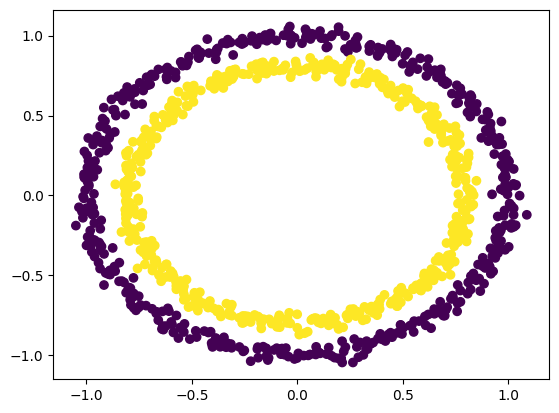

In [202]:
plt.scatter(data[:,0],data[:,1], c = target)
plt.show()
# lesser the noise, clearer the circles


In [203]:
# convert numpy array to tensor object
x = torch.from_numpy(data).type(torch.float)
y = torch.from_numpy(target).type(torch.float)

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [205]:
x.shape

torch.Size([1000, 2])

In [206]:
x_train.shape

torch.Size([750, 2])

In [207]:
x_test.shape

torch.Size([250, 2])

## Building model

In [208]:
# setup GPU for deep learning model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [209]:
device

'cpu'

In [346]:
# nn.Module is a parent class of our Model class
class Model(nn.Module):
  # constructor of our class
  def __init__(self):
    # calling parent class constructor
    super().__init__()
    #create input layer
    # in_features = input neurons in our input layer
    # out_fetatures = hidden layer neurons that is connected with input layer
    self.layer_1 = nn.Linear(in_features = 2, out_features = 4)
    self.layer_2 = nn.Linear(in_features = 4, out_features = 4)
    self.layer_3 = nn.Linear(in_features = 4, out_features = 1)
    self.activation = nn.ReLU()

  def forward(self, input_data):
    # first we pass our input data to forward method
    # then layer_1 will recieve input data
    # then we pass layer_1 output to layer_2
    # then we return output that is coming out from layer_2
    x = self.activation(self.layer_1(input_data))
    x = self.activation(self.layer_2(x))
    return self.layer_3(x)

In [347]:
# create object of our model class
model = Model().to(device)

In [348]:
model

Model(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)

In [349]:
# Another way of building a model
model_2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=4),
    nn.Linear(in_features=4, out_features=1)
).to(device)

In [350]:
model_2

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
)

In [351]:
# Backpropagation
  # Loss Function
  # Optimization

# we are using binary cross entropy loss function
loss = nn.BCEWithLogitsLoss()

# optimization technique
# optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.1)

In [352]:
# Evaluation metric
def accuracy(y_true, y_pred):
  # y_true and y_pred same then will add on to the answer since goioving correct results
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification/ len(y_pred)) * 100
  return acc

In [353]:
# here we are calling forward method of our model
y_logits = model(x_test)[:5]

In [354]:
y_logits

tensor([[-0.0265],
        [ 0.0164],
        [-0.0202],
        [-0.0287],
        [-0.0297]], grad_fn=<SliceBackward0>)

In [355]:
y_pred_probs = torch.sigmoid(y_logits)

In [356]:
y_pred_probs

tensor([[0.4934],
        [0.5041],
        [0.4949],
        [0.4928],
        [0.4926]], grad_fn=<SigmoidBackward0>)

In [357]:
y_pred = torch.round(y_pred_probs).squeeze() # to round off

In [358]:
y_pred

tensor([0., 1., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

In [359]:
y_test[:5]

tensor([1., 1., 0., 0., 1.])

In [360]:
accuracy(y_test[:5], y_pred)

60.0

Above analysis is done without training the data.


In [361]:
# Training loop
epochs = 1000
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
  #training - initialize weights and everything
  model.train()

  # apply feedforward
  y_logits = model(x_train).squeeze()

  # get predictions on training data
  y_pred = torch.round(torch.sigmoid(y_logits))

  # now find out loss
  # apply binary cross entropy to get loss
  train_loss = loss(y_logits, y_train)
  acc = accuracy(y_train, y_pred)

  # apply optimization - apply gradient descent
  optimizer.zero_grad()

  # backpropagation
  train_loss.backward()

  # to apply learning rate and all
  optimizer.step()

  # model evaluation
  model.eval()

  with torch.inference_mode():
    y_pred_test = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_pred_test))
    test_loss = loss(y_pred_test, y_test)
    test_acc = accuracy(y_test, test_pred)
  if epoch%100 == 0:
    print( f"Epoch : {epoch} | Loss: {train_loss:.4f} | Acc : {acc:.2f} | Test Loss : {test_loss:.4f} | Test Acc :{test_acc:.2f}")

Epoch : 0 | Loss: 0.6957 | Acc : 47.87 | Test Loss : 0.7076 | Test Acc :48.00
Epoch : 100 | Loss: 0.0811 | Acc : 98.80 | Test Loss : 0.0654 | Test Acc :99.20
Epoch : 200 | Loss: 0.0349 | Acc : 99.47 | Test Loss : 0.0517 | Test Acc :97.60
Epoch : 300 | Loss: 0.0280 | Acc : 99.07 | Test Loss : 0.0509 | Test Acc :97.60
Epoch : 400 | Loss: 0.1245 | Acc : 96.27 | Test Loss : 0.0762 | Test Acc :98.00
Epoch : 500 | Loss: 0.0205 | Acc : 99.47 | Test Loss : 0.0581 | Test Acc :97.20
Epoch : 600 | Loss: 0.0190 | Acc : 99.60 | Test Loss : 0.0613 | Test Acc :97.20
Epoch : 700 | Loss: 0.0179 | Acc : 99.60 | Test Loss : 0.0647 | Test Acc :97.20
Epoch : 800 | Loss: 0.0171 | Acc : 99.60 | Test Loss : 0.0679 | Test Acc :97.20
Epoch : 900 | Loss: 0.0165 | Acc : 99.60 | Test Loss : 0.0711 | Test Acc :97.20


In [362]:
y_train[:5]

tensor([0., 0., 0., 0., 1.])

In [363]:
y_pred[:5]

tensor([0., 0., 0., 0., 1.], grad_fn=<SliceBackward0>)

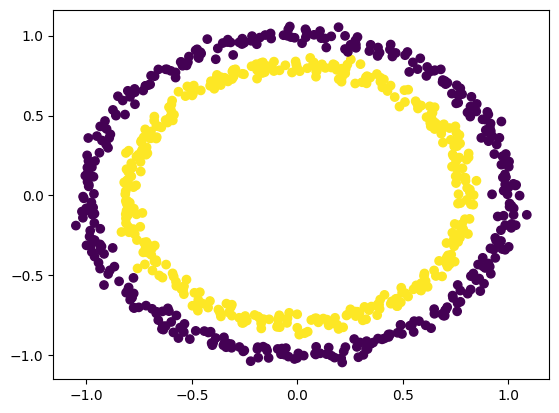

In [364]:
# plotting the training data
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.show()

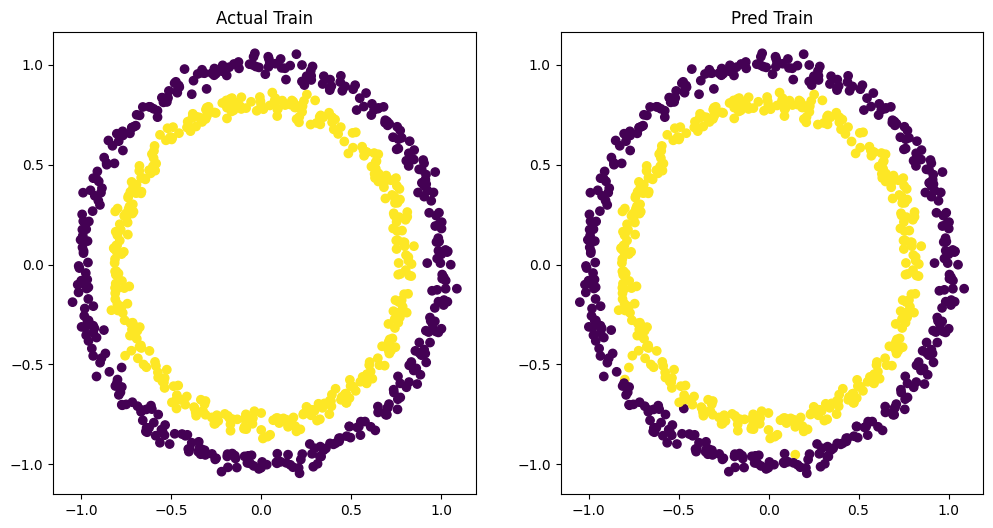

In [366]:
# Comparison
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Actual Train")
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)
plt.subplot(1,2,2)
plt.title("Pred Train")
plt.scatter(x_train[:,0], x_train[:,1], c = y_pred.detach().numpy())
plt.show()

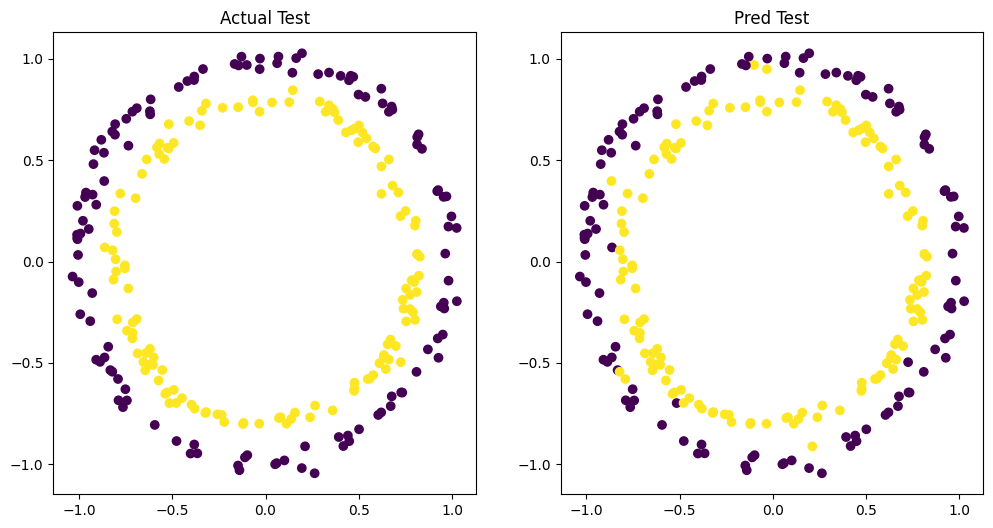

In [369]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Actual Test")
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)
plt.subplot(1,2,2)
plt.title("Pred Test")
plt.scatter(x_test[:,0], x_test[:,1], c = test_pred.detach().numpy())
plt.show()